In [3]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import color, io



In [4]:
# Load an example image (grayscale for simplicity)
# image = color.rgb2gray(io.imread('https://example.com/sample-image.jpg'))  # Replace with a local file if needed
image = color.rgb2gray(io.imread('https://raw.githubusercontent.com/scikit-image/scikit-image/main/skimage/data/astronaut.png')) #Example valid URL


In [5]:

# Convert the image into a matrix
A = np.array(image)



In [6]:
# Perform SVD
U, S, Vt = np.linalg.svd(A, full_matrices=False)

# Function to approximate the image using top k singular values
def approximate_image(U, S, Vt, k):
    # Use only the top k singular values
    U_k = U[:, :k]
    S_k = np.diag(S[:k])
    Vt_k = Vt[:k, :]

    # Reconstruct the image
    return np.dot(U_k, np.dot(S_k, Vt_k))



In [7]:
# Choose different values of k for compression
k_values = [5, 20, 50, 100]



In [8]:
# Plot the original and compressed images
plt.figure(figsize=(12, 8))



<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

(-0.5, 511.5, 511.5, -0.5)

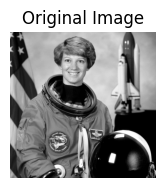

In [9]:
# Original image
plt.subplot(2, 3, 1)
plt.imshow(A, cmap='gray')
plt.title("Original Image")
plt.axis('off')



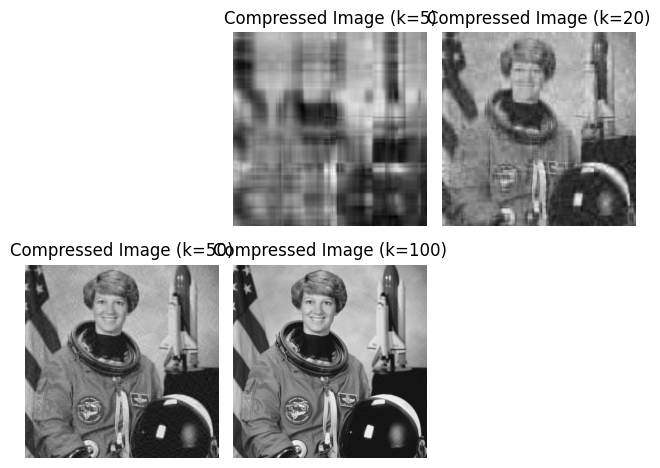

In [10]:
# Compressed images
for i, k in enumerate(k_values):
    A_k = approximate_image(U, S, Vt, k)
    plt.subplot(2, 3, i + 2)
    plt.imshow(A_k, cmap='gray')
    plt.title(f"Compressed Image (k={k})")
    plt.axis('off')

plt.tight_layout()
plt.show()